# LAB ASSIGNMENT

### NAME SIDHANTHA PODDAR
### ROLL NO 17BCE2044

## QUESTION 1:
    
- Use single-link, complete-link, average-link agglomerative clustering as well as medoid and centroid to cluster the following 8 examples:
- A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9).

In [1]:
import numpy as np

#Creating array of points given in the question
X = np.array([[2,10],  
    [2,5],
    [8,4],
    [5,8],
    [7,5],
    [6,4],
    [1,2],
    [4,9],])

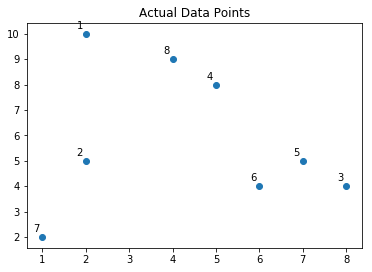

In [2]:
#visualising the following points on a graph
import matplotlib.pyplot as plt
%matplotlib inline 

labels = range(1, 11)  

plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.title('Actual Data Points')
plt.show()  

### Using Single Linked Agglomerative Clustering

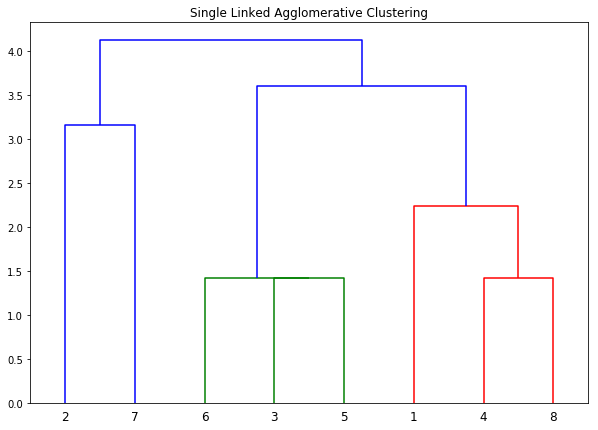

In [3]:
#Clustering the points after each iteration using single linkage agglomerative clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 9)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Single Linked Agglomerative Clustering')
plt.show()  

### Using Complete Linked Agglomerative Clustering

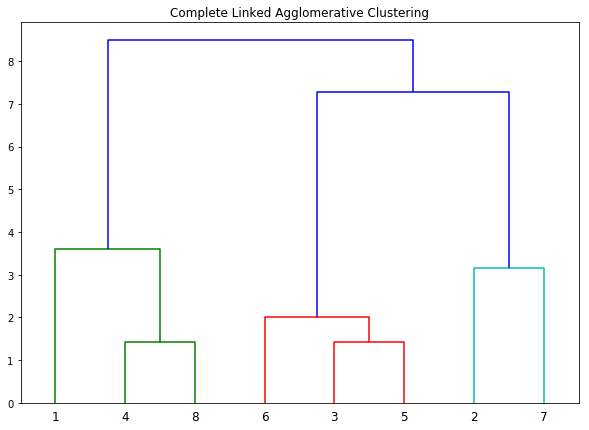

In [4]:
linked = linkage(X, 'complete')

labelList = range(1, 9)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Complete Linked Agglomerative Clustering')
plt.show()

### Using Average Linked Agglomerative Clustering


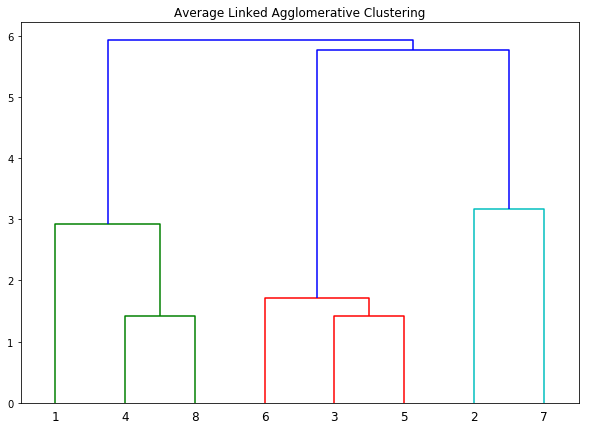

In [6]:
linked = linkage(X, 'average')

labelList = range(1, 9)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Average Linked Agglomerative Clustering')
plt.show()

### Using Medoids Clustering

In [8]:
import random
#Creating a function to cluster data points according to medoids
def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C


In [9]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# distance matrix
D = pairwise_distances(X, metric='euclidean')

# split into 2 clusters
M, C = kMedoids(D, 4)

print('medoids:')
for point_idx in M:
    print( X[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('Cluster {0}:　{1}'.format(label, X[point_idx]))

medoids:
[4 9]
[2 5]
[8 4]
[6 4]

clustering result:
Cluster 0:　[ 2 10]
Cluster 0:　[5 8]
Cluster 0:　[4 9]
Cluster 1:　[2 5]
Cluster 1:　[1 2]
Cluster 2:　[8 4]
Cluster 2:　[7 5]
Cluster 3:　[6 4]


### Using Centroid Clustering

In [10]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist

y = pdist(X)
Z = centroid(y)
m=fcluster(Z, 3, criterion='distance')
i=0
for label in m:
        print('Cluster {0}:　{1}'.format(label, X[i]))
        i=i+1

Cluster 1:　[ 2 10]
Cluster 3:　[2 5]
Cluster 2:　[8 4]
Cluster 1:　[5 8]
Cluster 2:　[7 5]
Cluster 2:　[6 4]
Cluster 4:　[1 2]
Cluster 1:　[4 9]


## QUESTION 2:
- Given a web graph with n nodes, where the nodes are pages and edges are hyperlinks . Assign each node an initial page rank.Repeat until convergence calculate the page rank of each node.

### 2 a)
- N=5
- damping=0.85

In [11]:
import scipy as sc
import pandas as pd
from fractions import Fraction
 
# keep it clean and tidy
def float_format(vector, decimal):
    return np.round((vector).astype(np.float), decimals=decimal)
dp = Fraction(1,5)
 
# WWW matrix
M = np.matrix([[0,0.5,0,0,0],
        [0,0,0,0,0.33],
        [1,0.5,0,0.5,0.33],
              [0,0,1,0,0.33],
              [0,0,0,0.5,0]])
 
E = np.zeros((5,5))
E[:] = dp
 
# Damping Factor
beta = 0.85
 
# WWW matrix
A = beta * M + ((1-beta) * E)
 
# initial vector
r = np.matrix([dp, dp, dp,dp,dp])
r = np.transpose(r)
 
previous_r = r
for it in range(1,100):
    r = A * r
    
    #check if converged
    if (previous_r==r).all():
        break
    previous_r = r
 
print("Final:\nNode 1: ",r[0])
print("Node 2: ",r[1])
print("Node 3: ",r[2])
print("Node 4: ",r[3])
print("Node 5: ",r[4])

Final:
Node 1:  [[0.05536933787005249]]
Node 2:  [[0.06941870459043953]]
Node 3:  [[0.2754721090284912]]
Node 4:  [[0.30392996261246036]]
Node 5:  [[0.15518984298947064]]


### 2b)
- N=3
- damping = 0.7

In [12]:
# we have 3 webpages and probability of landing to each one is 1/3
#(defaultProbability)
dp = Fraction(1,3)
 
# WWW matrix
M = np.matrix([[0,0.5,0],
        [0,0,1],
        [1,0.5,0]])
 
E = np.zeros((3,3))
E[:] = dp
 
# Damping Factor
beta = 0.7
 
# WWW matrix
A = beta * M + ((1-beta) * E)
 
# initial vector
r = np.matrix([dp, dp, dp])
r = np.transpose(r)
 
previous_r = r
for it in range(1,100):
    r = A * r
    
    #check if converged
    if (previous_r==r).all():
        break
    previous_r = r
 
print("Final:\nA: ",r[0])
print ("B: ",r[1])
print("C: ",r[2])

Final:
A:  [[0.23136246786632278]]
B:  [[0.3753213367609236]]
C:  [[0.3933161953727487]]


### 2 c)
- N=3
- damping=0.7

In [13]:
dp = Fraction(1,3)
 
# WWW matrix
M = np.matrix([[0,0.5,0],
        [1,0,1],
        [0,0.5,0]])
 
E = np.zeros((3,3))
E[:] = dp
 
# taxation
beta = 0.7
 
# WWW matrix
A = beta * M + ((1-beta) * E)
 
# initial vector
r = np.matrix([dp, dp, dp])
r = np.transpose(r)
 
previous_r = r
for it in range(1,100):
    r = A * r
    
    #check if converged
    if (previous_r==r).all():
        break
    previous_r = r
 
print("Final:\nA: ",r[0])
print ("B: ",r[1])
print("C: ",r[2])

Final:
A:  [[0.2647058823529392]]
B:  [[0.47058823529411425]]
C:  [[0.2647058823529392]]
